In [1]:
import numpy as np
#beta=np.random.uniform(0,1)
#mu=np.random.uniform(0,0.1)
#landa=np.random.randint(5,30)
#S0=np.random.uniform(0,1)
#I0=np.random.uniform(0,1)
#R0=0

#0 0.19412254001368667 0.3588882548871031 0.8564806332784639 0.04419908730698507 27
#print(R0,I0,S0,beta,mu,landa)
#R0=0
#I0=0.19412254001368667
#S0=0.3588882548871031
#beta=0.8564806332784639
#mu=0.04419908730698507
#landa=14
R0=0
I0=0.3
S0=0.7
beta=0.5
mu=0.05
landa=12

In [2]:
print(beta)
def f(x,t):
    #on suppose que x est un tableau contenant respectivement S,I,R
    return [-beta*x[1]*x[0],beta*x[1]*x[0]-x[1]/landa-mu*x[1],x[1]/landa]

0.5


# METHODE D'EULER EXPLICITE

In [3]:
#methode d'euler explicite
a=[S0,I0,R0]
def eulerexp(f,T,n,x):
    T=30
    res=[]
    res.append(x)
    t=0
    h=T/n
    temp=[]
    temp.append(t)
    while t<T:
        b=f(x,t)
        t+=h
        x=[x[0]+h*b[0],x[1]+h*b[1],x[2]+h*b[2]]
        res.append(x)
        temp.append(t)
    return [res,temp]
    

    

In [4]:
import matplotlib.pyplot as plt

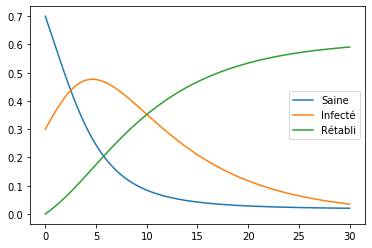

In [5]:
res,temp=eulerexp(f,30,1000,a)
[p1,p2,p3]=plt.plot(temp,res)
plt.legend([p1,p2,p3],["Saine","Infecté","Rétabli"])

# METHODE D'EULER IMPLICITE

In [6]:
#f est la fonction à ressoudre, [a b] est l'intervalle, e:l'erreur,yt: les valeurs S ET I en tn et h le pas 
def resoudreDichotomie(f,a,b,e,yt,h):
    debut = a
    fin = b
    print(f(debut,yt,h))
    print(f(fin,yt,h))
    ecart = b-a
    m = (debut+fin)/2
    while ecart>e and f(m,yt,h)!=0:
       
        
        if f(m,yt,h)>0:
            
            fin = m
        else:
            
            debut = m
        m = (debut+fin)/2
        ecart = fin-debut
    return m

In [7]:
def F(x,yt,h):
    return x-yt[1]-h*(beta*x*(yt[0]/(1+h*beta*x))-(x/landa)-(mu*x));
    
    

In [8]:
a=[S0,I0,R0]
def eulerimp(f,T,n,x):
    T=30
    res=[]
    res.append(x)
    t=0
    h=T/n
    temp=[]
    temp.append(t)
    while t<T:
        b=[]
        #je resoud I par dichotomie et de I j'en peut deduire les autres 
        ITp1=resoudreDichotomie(F,0,n*h,1.e-10,x,h)
        t+=h
        b.append(x[0]/(1+h*beta*ITp1))
        
        b.append(ITp1)
        
        b.append(x[2]+h*(ITp1/landa))
        print(b)
        x=b
        
        res.append(x)
        temp.append(t)
    return [res,temp]

In [26]:
res,temp=eulerimp(f,30,1000,a)

-0.3
29.602758620689656
[0.6968438370944992, 0.3019483694424707, 0.0007548709236061768]
-0.3019483694424707
29.601789750079927
[0.6936817420969149, 0.30389488490072836, 0.0015146081358579978]
-0.30389488490072836
29.600824574448506
[0.6905139473305246, 0.30583932240006106, 0.0022792064418581505]
-0.30583932240006106
29.599863245669777
[0.6873406865576438, 0.3077814573316573, 0.0030486600851872938]
-0.3077814573316573
29.598905915805627
[0.6841621949060884, 0.3097210647047177, 0.003822962746949088]
-0.3097210647047177
29.597952736876152
[0.6809787087955943, 0.31165791914645524, 0.004602107544815226]
-0.31165791914645524
29.5970038608825
[0.677790465864226, 0.313591794902095, 0.005386087032070464]
-0.313591794902095
29.5960594398297
[0.6745977048931528, 0.31552246599858336, 0.0061748931970669226]
-0.31552246599858336
29.5951196255863
[0.6714006657304256, 0.3174497063537274, 0.006968517462951241]
-0.3174497063537274
29.594184569798898
[0.6681995892154499, 0.31937328972162504, 0.0077669506

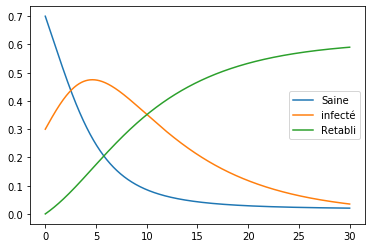

In [27]:
[p1,p2,p3]=plt.plot(temp,res)
plt.legend([p1,p2,p3],["Saine","infecté","Retabli"])

# METHODE DE RK2(heun)

In [28]:
def RK2(f,T,n,x):
    T=30
    res=[]
    res.append(x)
    t=0
    h=T/n
    temp=[]
    temp.append(t)
    while t<T:
        yn1=x
        fyn1=f(x,t)
        yn2=[x[0]+h*fyn1[0],x[1]+h*fyn1[1],x[2]+h*fyn1[2]]
        t+=h
        fyn2=f(yn2,t)
        x=[x[0]+h/2*(fyn1[0]+fyn2[0]),x[1]+h/2*(fyn1[1]+fyn2[1]),x[2]+h/2*(fyn1[2]+fyn2[2])]
        res.append(x)
        temp.append(t)
    return [res,temp]

In [29]:
print(R0,I0,S0,beta,mu,landa)

0 0.3 0.7 0.5 0.05 12


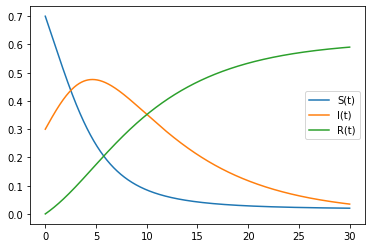

In [30]:
res,temp=RK2(f,30,1000,a)
[p1,p2,p3]=plt.plot(temp,res)
plt.legend([p1,p2,p3],["S(t)","I(t)","R(t)"])

# methode de rk ordre 4

In [31]:
def RK4m(f,T,n,x):
    T=30
    res=[]
    res.append(x)
    t=0
    h=T/n
    temp=[]
    temp.append(t)
    while t<T:
        yn1=x
        fyn1=f(x,t)
        yn2=[x[0]+h/2*fyn1[0],x[1]+h/2*fyn1[1],x[2]+h/2*fyn1[2]]
        t+=h/2
        fyn2=f(yn2,t)
        yn3=[x[0]+h/2*fyn2[0],x[1]+h/2*fyn2[1],x[2]+h/2*fyn2[2]]
        fyn3=f(yn3,t)
        yn4=[x[0]+h*fyn3[0],x[1]+h*fyn3[1],x[2]+h*fyn3[2]]
        fyn4=f(yn4,t)
        t+=h/2
        x=[x[0]+h/6*(fyn1[0]+2*fyn2[0]+2*fyn3[0]+fyn4[0]),x[1]+h/6*(fyn1[1]+2*fyn2[1]+2*fyn3[1]+fyn4[1]),x[2]+
           h/6*(fyn1[2]+2*fyn2[2]+2*fyn3[2]+fyn4[2])]
        res.append(x)
        temp.append(t)
    return [res,temp]

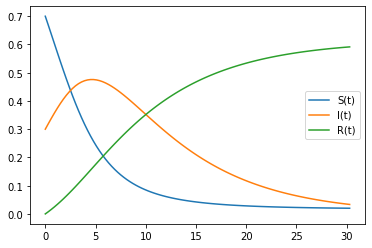

In [32]:
res,temp=RK4m(f,60,100,a)
[p1,p2,p3]=plt.plot(temp,res)
plt.legend([p1,p2,p3],["S(t)","I(t)","R(t)"])